 # FAKE NEWS DETECTION

 # Abdul Wahab
# 131-FBAS/BSIT4/F16

# LABELS
## 1: Fake
## 0: Real

 # Importing Liberaries

In [1]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# linear algebra
import numpy as np 
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

 # Loading Data Files

In [2]:
data=pd.read_csv('train.csv', index_col = "id")
data=data.fillna(' ')
data = data[["title", "text", "label"]]
data.info()
data["article"] = data["title"] + data["text"]
data = data[["article", "label"]]
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 3 columns):
title    20800 non-null object
text     20800 non-null object
label    20800 non-null int64
dtypes: int64(1), object(2)
memory usage: 650.0+ KB


,article,label
id,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You FiredWhy the Truth...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,0
8,Excerpts From a Draft Script for Donald Trump’...,0


# Data Preprocessing

In [3]:


# some errors in row 4643 in the TEXT column so I replace with custom Text

data.drop(4642 , inplace = True)

#data.ix[4642, "text"] = "Replacing some text"


In [4]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

print("The Stop words in English are:\n")
print(stopwords.words("english"))
print("\n")

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

    

The Stop words in English are:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only'

 # Features Extraction

In [5]:
corpus = []
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_verbs(words)
    words = ' '.join(words)
    corpus.append(words)
    return words
#data["article"] = data["title"] + data["text"]
for index, row in data.iterrows():
    
    normalize(row['article'].split(' '))
    

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features = 20000)
X = cv.fit_transform(corpus).toarray()
y = data["label"].values

# Saving cv variable for Testing phase

In [7]:
filename = 'cv.pickle'
pickle.dump(cv, open(filename, 'wb'))

# Split in Samples

In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=0)

# Naive Bayes Classifier

Accuracy of NB  classifier on training set: 94.96
Accuracy of NB classifier on test set: 93.92


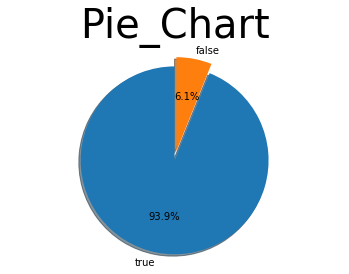

In [8]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format((NB.score(X_train, y_train)*100)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format((NB.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(NB.score(X_test, y_test)*100), 100-((NB.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

# Logistic Regression

Accuracy of Logistic Regression on training set: 94.96
Accuracy of Logistic Regression on test set: 95.60


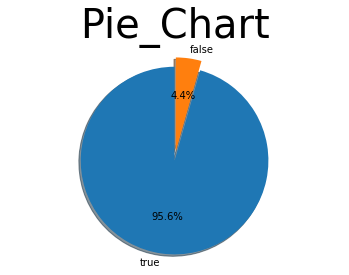

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format((NB.score(X_train, y_train)*100)))
print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format((logreg.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(logreg.score(X_test, y_test)*100), 100-((logreg.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

# Random Forest Classifier

Accuracy of randomforest classifier on training set: 99.10
Accuracy of randomforest classifier on test set: 87.88


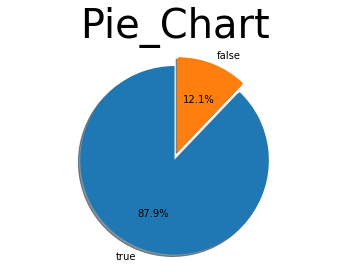

In [10]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(n_estimators=5)

Random.fit(X_train, y_train)
print('Accuracy of randomforest classifier on training set: {:.2f}'
     .format((Random.score(X_train, y_train)*100)))
print('Accuracy of randomforest classifier on test set: {:.2f}'
     .format((Random.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(Random.score(X_test, y_test)*100), 100-((Random.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

# Decision Tree

Accuracy of Adaboost classifier on training set: 92.44
Accuracy of Adaboost classifier on test set: 91.88


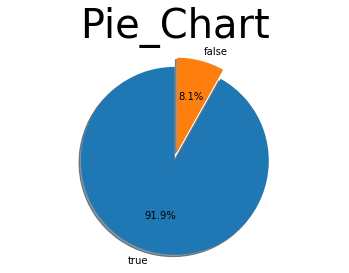

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(X_train, y_train)
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format((Adab.score(X_train, y_train)*100)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format((Adab.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(Adab.score(X_test, y_test)*100), 100-((Adab.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

 # K Nearest Neighboer

Accuracy of KNN on training set: 82.72
Accuracy of KNN on test set: 78.17


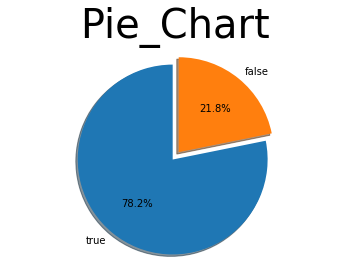

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
print('Accuracy of KNN on training set: {:.2f}'
     .format((classifier.score(X_train, y_train)*100)))
print('Accuracy of KNN on test set: {:.2f}'
     .format((classifier.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(classifier.score(X_test, y_test)*100), 100-((classifier.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

 # Support Vector Machine

Accuracy of SVM on training set: 100.00
Accuracy of SVM on test set: 95.12


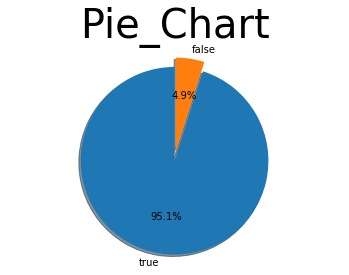

In [12]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
print('Accuracy of SVM on training set: {:.2f}'
     .format((clf.score(X_train, y_train)*100)))
print('Accuracy of SVM on test set: {:.2f}'
     .format((clf.score(X_test, y_test)*100)))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(clf.score(X_test, y_test)*100), 100-((clf.score(X_test, y_test))*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

 # Neural Network

Train on 16639 samples
Epoch 1/50
16639/16639 - 17s - loss: 0.1638 - accuracy: 0.9495
Epoch 2/50
16639/16639 - 11s - loss: 0.0336 - accuracy: 0.9910
Epoch 3/50
16639/16639 - 10s - loss: 0.0213 - accuracy: 0.9953
Epoch 4/50
16639/16639 - 11s - loss: 0.0074 - accuracy: 0.9986
Epoch 5/50
16639/16639 - 10s - loss: 0.0040 - accuracy: 0.9994
Epoch 6/50
16639/16639 - 10s - loss: 0.0018 - accuracy: 0.9999
Epoch 7/50
16639/16639 - 10s - loss: 9.8853e-04 - accuracy: 0.9999
Epoch 8/50
16639/16639 - 10s - loss: 6.2268e-04 - accuracy: 0.9999
Epoch 9/50
16639/16639 - 10s - loss: 4.1646e-04 - accuracy: 1.0000
Epoch 10/50
16639/16639 - 10s - loss: 2.8352e-04 - accuracy: 1.0000
Epoch 11/50
16639/16639 - 10s - loss: 2.0169e-04 - accuracy: 1.0000
Epoch 12/50
16639/16639 - 10s - loss: 1.4370e-04 - accuracy: 1.0000
Epoch 13/50
16639/16639 - 9s - loss: 1.0389e-04 - accuracy: 1.0000
Epoch 14/50
16639/16639 - 11s - loss: 7.4614e-05 - accuracy: 1.0000
Epoch 15/50
16639/16639 - 9s - loss: 5.4606e-05 - accuracy:

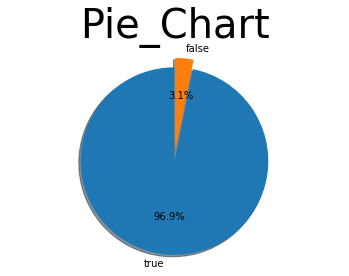

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(50, input_shape=(20000,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(X_train, y_train, epochs=50, verbose=2)

# evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(' \n Test Accuracy of Neural Network: %f' % (acc*100))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true', 'false'
sizes = [(acc*100), 100-(acc*100)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie_Chart',fontsize=40)
plt.show()

In [11]:
model_json = model.to_json()
open('./model_mobilenet.json', 'w+').write(model_json)
model.save_weights('./weights_mobilenet.h5')

In [39]:
from tensorflow.python.keras.models import load_model, model_from_json
f = open('./model_mobilenet.json','r')
model = model_from_json(f.read())
model.load_weights('./weights_mobilenet.h5')

def normalize_test(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_verbs(words)
    words = ' '.join(words)
    return words

input_str = input("Enter text here to check the news weather it's Real or Fake\n")
input_str =  normalize_test(input_str)
x = []
x.append(input_str)
x = cv.transform(x).toarray()

predicted = model.predict_classes(x)
predicted

Enter text here to check the news weather it's Real or Fake
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of “an unrelated case”–which we now know to be Anthony Weiner’s sexting with a teenager. But apparently such little things as facts didn’t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary wins–at least two years’ worth, and possibly an entire term’s worth of them. Apparently Chaffetz thought the FBI was already doing his work for him–resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 


array([[1]])

In [23]:

if predicted[0][0]:
    print("It looks like Fake News.")
# if 0 then
else:
    print("There doesn't seems to be anything wrong with this news.")

It looks like Fake News.
